## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/AI_ML/Residency 8 lab/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:

from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd


In [0]:
labels = pd.read_csv('labels.csv')

In [11]:
labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


### Print the count of each category of Dogs given in the dataset



In [12]:
labels['breed'].nunique()

120

In [13]:
breed_count = labels['breed'].value_counts()
breed_count.head()



scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [14]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
breed_encoded = encoder.fit_transform(labels['breed'])
print(breed_encoded)

[19 37 85 ...  3 75 28]


In [16]:
import keras

y = keras.utils.to_categorical(breed_encoded,num_classes=None,dtype='int')

Using TensorFlow backend.


In [17]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols =128
num_channel = 1 

In [19]:
from tqdm import tqdm
import cv2

x_feature =[]
y_feature = []


for f , img in tqdm(labels.values):
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
    x_feature.append(train_img_resize)
    y_feature.append(img)
    


100%|██████████| 10222/10222 [00:27<00:00, 375.53it/s]


In [20]:
y_feature[1]

'dingo'

In [21]:
x_feature[1]

array([[[ 35,  45,  63],
        [ 19,  33,  57],
        [ 22,  42,  74],
        ...,
        [ 37,  69, 112],
        [ 16,  48,  91],
        [ 25,  45,  76]],

       [[ 19,  33,  55],
        [ 16,  31,  57],
        [ 17,  35,  62],
        ...,
        [ 19,  34,  58],
        [  4,  16,  39],
        [ 28,  36,  51]],

       [[ 15,  35,  67],
        [ 17,  34,  63],
        [ 22,  35,  61],
        ...,
        [  5,  13,  32],
        [ 26,  40,  59],
        [ 17,  18,  31]],

       ...,

       [[ 32,  95, 169],
        [ 45, 117, 187],
        [ 15,  70, 152],
        ...,
        [  9,  20,  47],
        [ 17,  24,  48],
        [ 12,  21,  35]],

       [[ 27,  99, 179],
        [ 34, 109, 180],
        [ 35,  79, 158],
        ...,
        [ 21,  30,  50],
        [ 17,  21,  48],
        [ 23,  26,  47]],

       [[ 52, 124, 203],
        [ 50, 124, 195],
        [ 20,  65, 145],
        ...,
        [  5,  16,  42],
        [  1,   5,  38],
        [ 19,  20,  49]]

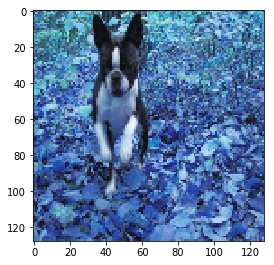

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(50,50))

for i in range(1):
  plt.subplot(10,10,i+1)
  plt.imshow(x_feature[i], cmap=plt.cm.binary)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_feature = np.array(x_feature, dtype=np.float32)

In [24]:
x_feature /= 255
print('x_feature shape:', x_feature.shape)

x_feature shape: (10222, 128, 128, 3)


In [25]:
x_feature[1]

array([[[0.13725491, 0.1764706 , 0.24705882],
        [0.07450981, 0.12941177, 0.22352941],
        [0.08627451, 0.16470589, 0.2901961 ],
        ...,
        [0.14509805, 0.27058825, 0.4392157 ],
        [0.0627451 , 0.1882353 , 0.35686275],
        [0.09803922, 0.1764706 , 0.29803923]],

       [[0.07450981, 0.12941177, 0.21568628],
        [0.0627451 , 0.12156863, 0.22352941],
        [0.06666667, 0.13725491, 0.24313726],
        ...,
        [0.07450981, 0.13333334, 0.22745098],
        [0.01568628, 0.0627451 , 0.15294118],
        [0.10980392, 0.14117648, 0.2       ]],

       [[0.05882353, 0.13725491, 0.2627451 ],
        [0.06666667, 0.13333334, 0.24705882],
        [0.08627451, 0.13725491, 0.23921569],
        ...,
        [0.01960784, 0.05098039, 0.1254902 ],
        [0.10196079, 0.15686275, 0.23137255],
        [0.06666667, 0.07058824, 0.12156863]],

       ...,

       [[0.1254902 , 0.37254903, 0.6627451 ],
        [0.1764706 , 0.45882353, 0.73333335],
        [0.05882353, 0

In [0]:
x_feature = x_feature.reshape(x_feature.shape[0],128,128,3)

In [27]:
encoder =  LabelEncoder()
y_feature = encoder.fit_transform(y_feature)
print(y_feature)

[19 37 85 ...  3 75 28]


In [0]:
y_feature = keras.utils.to_categorical(y_feature,num_classes=None,dtype='int')

In [29]:
y_feature[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
x_train_data=x_feature

In [0]:
y_train_data = y_feature

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
trainX, validationX,trainY,validationY = train_test_split(x_train_data,y_train_data, test_size=0.3, random_state=100)

In [33]:
trainX.shape

(7155, 128, 128, 3)

In [34]:
validationX.shape

(3067, 128, 128, 3)

In [35]:
trainY.shape

(7155, 120)

In [36]:
validationY.shape

(3067, 120)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
 test_img = pd.read_csv("sample_submission.csv" , usecols = ["id"])

In [38]:
test_img.shape

(10357, 1)

In [0]:
test_img = test_img['id']

In [40]:
format(test_img.values)

"['000621fb3cbb32d8935728e48679680e' '00102ee9d8eb90812350685311fe5890'\n '0012a730dfa437f5f3613fb75efcd4ce' ... 'fff74b59b758bbbf13a5793182a9bbe4'\n 'fff7d50d848e8014ac1e9172dc6762a3' 'fffbff22c1f51e3dc80c4bf04089545b']"

In [41]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [42]:

x_test_feature = []
i = 0 # initialisation

for t in tqdm(test_img.values): # f for format ,jpg
    img = plt.imread('./test/{}.jpg'.format(t), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)
      
    

100%|██████████| 10357/10357 [00:41<00:00, 247.98it/s]


In [43]:
x_test_feature[1]

array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[108, 110, 105],
        [ 89,  91,  86],
        [104, 106, 101],
        ...,
        [111, 108,  99],
        [103, 101,  92],
        [109, 107, 104]],

       [[113, 118, 113],
        [122, 128, 122],
        [125, 130, 124],
        ...,
        [123, 126, 118],
        [116, 119, 111],
        [122, 118, 115]],

       [[117, 122, 116],
        [117, 119, 114],
        [132, 131, 127],
        ...,
        [127, 129, 126],
        [121, 123, 120],
        [111, 110, 108]]

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature, dtype=np.float32)

In [0]:
x_test_feature /= 255

In [46]:
x_test_feature.shape[0]

10357

In [0]:
x_test_feature = x_test_feature.reshape(x_test_feature.shape[0],128,128,3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler
import keras.backend as K
from keras.optimizers import adam

K.set_image_dim_ordering('tf')

In [49]:
model = Sequential()
model.add(BatchNormalization(input_shape = (128,128,3)))

## define a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3)

## 1st Conv Layer
model.add(Convolution2D(filters=64, kernel_size=5, activation ='relu', input_shape = (128, 128, 3))) 
model.add(Activation('relu'))

## 2nd Conv Layer
model.add(Convolution2D(filters=64, kernel_size=3, padding='same', activation='relu'))


model.add(Flatten())

# fully connected layer
##classification_layers
model.add(Dense(256, activation ='relu'))
model.add(Dense(120, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
optimizer = keras.optimizers.Adam(lr=0.001)

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(optimizer='sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [52]:
batch_size = 128
nb_epochs = 10
history = model.fit(trainX,trainY,
                    epochs=10, 
                    batch_size = 128,
                    validation_data=(validationX,validationY),
                    verbose = 1,
                    initial_epoch=0)

Instructions for updating:
Use tf.cast instead.
Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 57s 8ms/step - loss: 4.7865 - acc: 0.0138 - val_loss: 4.7621 - val_acc: 0.0160
Epoch 2/10
7155/7155 [==============================] - 45s 6ms/step - loss: 4.7065 - acc: 0.0201 - val_loss: 4.7221 - val_acc: 0.0179
Epoch 3/10
7155/7155 [==============================] - 45s 6ms/step - loss: 4.6088 - acc: 0.0347 - val_loss: 4.6629 - val_acc: 0.0293
Epoch 4/10
7155/7155 [==============================] - 45s 6ms/step - loss: 4.4537 - acc: 0.0523 - val_loss: 4.6614 - val_acc: 0.0264
Epoch 5/10
7155/7155 [==============================] - 45s 6ms/step - loss: 4.2534 - acc: 0.0818 - val_loss: 4.5891 - val_acc: 0.0421
Epoch 6/10
7155/7155 [==============================] - 45s 6ms/step - loss: 3.9731 - acc: 0.1230 - val_loss: 4.6110 - val_acc: 0.0414
Epoch 7/10
7155/7155 [==============================] - 45s 6ms/step - loss: 3.5444 - acc: 0.1

In [0]:
del history

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(trainX)

In [55]:
trainX.shape

(7155, 128, 128, 3)

In [0]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [57]:
#training
batch_size = 128
 
## opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist_1 = model.fit_generator(datagen.flow(trainX, trainY, batch_size=batch_size),\
                    steps_per_epoch=trainX.shape[0] // batch_size,epochs=10,\
                    verbose=1,validation_data=(validationX,validationY),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/10
55/55 [==============================] - 51s 925ms/step - loss: 4.8174 - acc: 0.0655 - val_loss: 4.9008 - val_acc: 0.0430
Epoch 2/10
55/55 [==============================] - 47s 852ms/step - loss: 4.4016 - acc: 0.0789 - val_loss: 4.7108 - val_acc: 0.0466
Epoch 3/10
55/55 [==============================] - 47s 851ms/step - loss: 4.3154 - acc: 0.0794 - val_loss: 4.6331 - val_acc: 0.0489
Epoch 4/10
55/55 [==============================] - 47s 851ms/step - loss: 4.2372 - acc: 0.0896 - val_loss: 4.5971 - val_acc: 0.0505
Epoch 5/10
55/55 [==============================] - 47s 851ms/step - loss: 4.2092 - acc: 0.0853 - val_loss: 4.5651 - val_acc: 0.0502
Epoch 6/10
55/55 [==============================] - 47s 853ms/step - loss: 4.1761 - acc: 0.0942 - val_loss: 4.5463 - val_acc: 0.0538
Epoch 7/10
55/55 [==============================] - 47s 852ms/step - loss: 4.1263 - acc: 0.0972 - val_loss: 4.5383 - val_acc: 0.0551
Epoch 8/10
55/55 [==============================] - 47s 852ms/step - 

In [53]:
del hist_1

NameError: ignored

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
train_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
## train_generator.fit(trainX)
train_generator = train_generator.flow(trainX,trainY,batch_size=64)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
val_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
## val_generator.fit(validationX)
val_generator = val_generator.flow(validationX,validationY,batch_size=64)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [65]:
#Fit_Generator
hist2 = model.fit_generator(train_generator,
                    steps_per_epoch=128,
                    samples_per_epoch=trainX.shape[0],
                    nb_epoch=10,
                    validation_data=val_generator,
                            validation_steps = 20,callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=111, validation_data=<keras_pre..., validation_steps=20, callbacks=[<keras.ca..., epochs=10)`
  


Epoch 1/10
111/111 [==============================] - 52s 470ms/step - loss: 4.4396 - acc: 0.0553 - val_loss: 4.6164 - val_acc: 0.0328
Epoch 2/10
111/111 [==============================] - 51s 463ms/step - loss: 4.3897 - acc: 0.0573 - val_loss: 4.5834 - val_acc: 0.0383
Epoch 3/10
111/111 [==============================] - 51s 456ms/step - loss: 4.3738 - acc: 0.0528 - val_loss: 4.5135 - val_acc: 0.0392
Epoch 4/10
111/111 [==============================] - 51s 456ms/step - loss: 4.3562 - acc: 0.0599 - val_loss: 4.6150 - val_acc: 0.0328
Epoch 5/10
111/111 [==============================] - 50s 455ms/step - loss: 4.3127 - acc: 0.0663 - val_loss: 4.5060 - val_acc: 0.0353
Epoch 6/10
111/111 [==============================] - 50s 455ms/step - loss: 4.3111 - acc: 0.0616 - val_loss: 4.5164 - val_acc: 0.0367
Epoch 7/10
111/111 [==============================] - 50s 454ms/step - loss: 4.2834 - acc: 0.0711 - val_loss: 4.5248 - val_acc: 0.0461
Epoch 8/10
111/111 [==============================] - 5

In [0]:
del hist2

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
path = '/content/drive/My Drive/AI_ML/Residency 8 lab/DogBreed_Classification/'

In [72]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights='imagenet',
                 include_top=False, pooling='avg')

58892288/58889256 [==============================] - 2s 0us/step


Print the summary of the base_model

In [73]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from keras.layers import Input
input = Input(shape=(128,128,3),name = 'image_input')
output_vgg16 = base_model(input)

In [0]:
##newmodel = Dense(1024, activation='relu', name='ds1')(output_vgg16)
##newmodel = Dense(256, activation='relu', name='ds2')(newmodel)
##newmodel = Dense(120, activation='softmax', name='predictions')(newmodel)

In [75]:


newmodel = Dense(1024, activation='relu', name='ds1',use_bias=False, kernel_initializer='uniform')(output_vgg16)
newmodel = BatchNormalization()(newmodel)
newmodel = Dense(256, activation='relu', name='ds2')(newmodel)
newmodel=  Dropout(0.3)(newmodel)
newmodel = Dense(120, activation='softmax', name='predictions',kernel_initializer='uniform')(newmodel)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Make all the layers in the base_model (VGG16) to be non-trainable

In [76]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in base_model.layers:
  #if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in base_model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_3
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d_3
False


In [77]:
mymodel = Model(input=input, output=newmodel)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  """Entry point for launching an IPython kernel.


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
optimizer = adam(lr=0.1)
mymodel.compile(optimizer='rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [79]:
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 128, 128, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
ds1 (Dense)                  (None, 1024)              524288    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
ds2 (Dense)                  (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
predictions (Dense)          (None, 120)               30840     
Total para

In [80]:
history = mymodel.fit(trainX,trainY,
                    epochs=10, 
                    validation_data=(validationX,validationY),
                    batch_size=20,
                    verbose = 1,
                    initial_epoch=0)

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 46s 6ms/step - loss: 4.1321 - acc: 0.0920 - val_loss: 3.7031 - val_acc: 0.1425
Epoch 2/10
7155/7155 [==============================] - 43s 6ms/step - loss: 3.3471 - acc: 0.1951 - val_loss: 3.6532 - val_acc: 0.1601
Epoch 3/10
7155/7155 [==============================] - 43s 6ms/step - loss: 3.0392 - acc: 0.2602 - val_loss: 3.8552 - val_acc: 0.1780
Epoch 4/10
7155/7155 [==============================] - 43s 6ms/step - loss: 2.8200 - acc: 0.2976 - val_loss: 3.8100 - val_acc: 0.1803
Epoch 5/10
7155/7155 [==============================] - 43s 6ms/step - loss: 2.6657 - acc: 0.3280 - val_loss: 3.6810 - val_acc: 0.2044
Epoch 6/10
7155/7155 [==============================] - 43s 6ms/step - loss: 2.5146 - acc: 0.3606 - val_loss: 3.7526 - val_acc: 0.1950
Epoch 7/10
7155/7155 [==============================] - 43s 6ms/step - loss: 2.3955 - acc: 0.3800 - val_loss: 3.6324 - val_acc: 0.1937
Epoch 8

In [0]:
del history

In [0]:
del newmodel